# **Part05 강화학습 개요**
단국대 황창하 교수님
- 1. 강화학습이란?
- 2. From Bandit to Reinforcement
- 3. MCPE & Q-Learning

## 들어가기 전에...
- 사람의 뇌에 활성화되는 부분은 다 다름
- Neuro-Science를 잠시 연구하셨으나 쉽지 않다..
- 뇌의 활성화 =>> 알고리즘을 만드는 사람은 정말 탑클래스..
- 제프리 힌튼, 86년, Backpropagation 알고리즘 등장 후, 신경망이 현재처럼 붐을 이룸
- 그때보다 더 심하게 지금 활성화되고 있음
- 신경망에 태생적인 문제가 존재.. SVM 등장 후 신경망을 몰살시킴
- 힌튼, 06년, 새로운 신경망 딥러닝 알고리즘 소개
- Andrew Ng, 12년 구글

## 5-1. 강화학습이란 무엇인가?
- 1. 강화학습 사례
- 2. 강화학습 정의
- 3. 강화학습 프레임워크

### 5-1-1. 강화학습 사례
- AlphaGo
- OSARO
- Preferred Network
- Blade and Soul, NC Soft
- Kindred
- Microsoft

### 5-1-2. 강화학습 정의
- 모든 상황, 환경에서 최적의 결과가 무엇인지 알 수 있을까?
- 학습을 위해서는 어떤 알고리즘을 써야 할까?
- 일반적으로 지도학습은 instance별로 서로 영향을 주지 않는다고 가정, i.i.d
- 강화학습은 다르다. 지금 정하는 행위는 과거에 한 행위에 영향을 받는다.
    - Sequential Decision data에 사용
- 이러한 상황에서 어떠한 선택을 내릴 것인지를 선택
- 바둑의 경우의 수
    $$10^{360}$$

#### 강화, Reinforcement의 유래
- 심리학, 초기 행동주의에서 유래 (Dollard and Miller's Behavioral Conceptions)
    1. 동기유발 (Drive) : 배고픔, 갈증, 성욕
    2. 자극 (Cue) : 종소리, 조명
    3. 반응 (Response) : 행동, 사고
    4. 강화 (Reinforcement) : 동기 유발된 요소를 충족시키는 보상

### 5-1-3. 강화학습 프레임워크
- 강화학습은 주어진 환경에 따라, 행동하는 Agent를 보상에 의해 강화(Reinforcement) 시키는 문제
- 어떻게 문제를 풀어야 하는가?
    - 액션 의존성 : 각 액션은 다른 보상을 가져와야 한다.
    - 시간 의존성 : 보상은 시간이 지연되고 나서 주어진다.
    - 상태 의존성 : 어떤 액션에 대한 보상은 환경의 상태에 좌우된다.
- AlphaGo, 자율 주행차, 외원판 문제(TSP Problem)
- 물류 쪽에도 적용할 수 있고..

#### $\text{Markov Decision Process (MDP)}$
- "강화학습은 MDP로 표현되는 문제를 푸는 알고리즘의 집합"
- 골에 도달하기 위해 움직이는 로봇, 과거의 경로가 의미가 있을까?
- 현재 위치에서 다른 방향으로 가는 것만 신경쓰면 되지 않을까?
$$P(R_{t+1}=r,S_{t+1}=s^{'}\;\big|\;S_t,A_t)$$
$$where\;R_{t+1}:Reward\;at\;t+1,\;S_t:State\;at\;t,\;A_t:Action\;at\;t$$
- State에 대해, 어떤 Action을 하고,
    - 다음 State로 움직이고 나서 최적의 보상을 얻는 확률을 구하면 어떨까?
    - 그리고, 최적화된 확률에 따라서만 움직인다면?
- 에피소드 : 게임으로 치면, 죽는 것 까지의 행위
- A Markov Decision Process is tuple <S, A, P, R, $\gamma$>
    - S is a finite set of states
    - A is finite set of actions
    - P is a state transition probability matrix (상태 전위 확률 행렬)
        - $P_{ss^{'}}^{a}=\mathbb{P}\big[S_{t+1}=s^{'}\;\big|\;S_t=s,A_t=a\big]$
        - 해당위치에서 움직여 다른 위치로 갈 확률
    - R is a reward function, $R_{s}^{a}=\mathbb{E}\big[R_{t+1}\;\big|\;S_t=s,A_t=a\big]$
        - 위치/행동의 보상
        - 보상의 값을 다르게 부여, 최종적인 보상을 최대로!
    - $\gamma$ is a discount factor $\gamma\;{\in}\;[0,1]$
- Policy ($\pi$)
    - 어떤 State에서 어떤 Action을 하지?
    - Policy는 강화학습의 목적 = Optimal Policy = Reward Maximiza Policy
    - A policy $\pi$ is a distribution over actions given states,
    $${\pi}(a|s)=\mathbb{P}\big[A_t=a\;\big|\;S_t=s\big]$$
- Total discounted reward from time-step t
$$G_t=R_{t+1}+{\gamma}R_{t+2}+\cdots=\sum_{k=0}^{\infty}{\gamma}^{k}R_{t+k+1}$$
- Value function & Action-Value function
    1. Value function
        - $v_{\pi}(s)=\mathbb{E}_{\pi}\big[G_t\;\big|\;S_t=s\big]$
        - 시작위치 s에서 얻을 수 있는 보상에 대한 기댓값
        - 누적 보상에 대한 기댓값
    2. Action-Value function
        - $q_{\pi}(s,a)=\mathbb{E}_{\pi}\big[G_t\;\big|\;S_t=s,A_t=a\big]$
        - 어떤 상태 s에서 행동 a를 취할 경우, 보상에 대한 기댓값
- 그래서, 어떻게 나갈 것인가?
    - Day 1. State, Action, Reward
    - Day 2. Monte Carlo Policy Evaluation, Q-Learning
        - MCPE, 끝까지 가보고 보상을 학습하자
        - Q-Learning, 굳이.. 정책까지 학습해야 할까? 끝까지 가야할까? >> Action을 바로 선택하자!
    - Day 3~4. Deep Q Network
        - Q-Learning은 state와 action이 많은 경우에 쓰기 어렵다..
        - 그림은.. 어떻게 state로 만들지?
    - Day 5. From AlphaGo to Alpha Zero + ?, 범용 알고리즘으로 진화
        - DQN으로만 모든 것이 가능할 것인가?

## 5-2. From Bandit to Reinforcement
1. Multi-Armed Bandit
2. Multi-Armed Bandit using Tensorflow
3. Context Multi-Armed Bandit
4. Context Multi-Armed Bandig using Tensorflow
5. From Bandit to Reinforcement Problem

### 5-2-1. Multi-Armed Bandit
- 손잡이가 4개인 하나의 슬롯머신이 존재
- 각각의 손잡이가 양의 보상(+1)을 줄 확률은,
$$[0.1,\;0.3,\;0.9,\;0.5]$$
- 양의 보상 외에는 음의 보상(-1)을 준다고 가정할 때,
- 어떤 정책/전략이 가장 높은 보상을 주는가?
- 강화학습은 당겨본 경험을 바탕으로 그 레버를 당기는 경향이 존재
- 아니야, 랜덤하게 당겨보자
- Exploration vs Exploitation
    - Exploration : 정보를 더 모으고자 모험적 행동을 해보는 것
    - Exploitation : 아는 것을 바탕으로 최선을 다 하는 것
- Bandit 문제는 State가 없음
    - 강화학습이 아니라는 얘기, 강화학습에 다가가기 위한 문제
    - 행동을 취했을 때, 상황이 변하지 않음
    - 상황이 딱 한개, 고려할 필요가 없음

- Multi-armed bandit problem 
- 강화학습 첫걸음
- https://github.com/kyoseoksong/RL_Book

### 5-2-2. Multi Armed Bandit Python Code

In [1]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
import numpy as np

In [2]:
#밴딧의 손잡이 목록을 작성한다 
#손잡이 4 (인덱스 #3)가 가장 자주 양의 보상을 제공하도록 설
bandit_arms = [0.2,0,-0.2,-2] # Z값
num_arms = len(bandit_arms)
def pullBandit(bandit):
    #랜덤값을 구한다
    result = np.random.randn(1)
    if result > bandit:
        #양의 보상 1을 반환한다
        return 1
    else:
        #음의 보상 -1을 반환한다
        return -1

In [104]:
init_prob = np.random.rand(4)
print(init_prob)
score_dict = {bandit:0 for bandit in bandit_arms}
trial = 0
while trial < 10000:
    bandit = np.random.choice(bandit_arms, p=init_prob / sum(init_prob))
    reward = pullBandit(bandit)
    score_dict[bandit] += reward
    init_prob[np.where(np.array(bandit_arms) == bandit)[0][0]] *= (1 + reward * .1)
    init_prob = init_prob / sum(init_prob)
    trial += 1
score_dict, init_prob

[0.33662991 0.9739026  0.8027524  0.05652408]


({0.2: 5, 0: -3, -0.2: 1558, -2: 4},
 array([3.72840599e-47, 4.93190766e-47, 1.00000000e+00, 6.48565403e-48]))

In [134]:
tf.reset_default_graph()
# 신경망의 전방향(feed-forward) 부분을 구축한다.
weights = tf.Variable(tf.ones([num_arms]))
output = tf.nn.softmax(weights)
# 학습 과정을 구축
# (1) 보상과 선택된 행동을 신경망에 feed함으로써 비용을 계산한다.
# (2) 비용을 이용해 신경망을 업데이트한다.
reward_holder = tf.placeholder(shape=[1], dtype=tf.float32)
action_holder = tf.placeholder(shape=[1], dtype=tf.int32)

responsible_output = tf.slice(output, action_holder, [1]) # output에서 action_holder에 해당하는 값 1개를 추룰
loss = -(tf.log(responsible_output) * reward_holder) # reward_holder: 행동이 어떤 기준선 보다 나은 정도
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
update = optimizer.minimize(loss)

In [ ]:
total_episodes = 1000 # 에이전트를 학습시킬 전체 에피소드 횟수 설정
total_reward = np.zeros(num_arms) # 밴딧의 손잡이에 대한 보상을 0으로 설정

init = tf.global_variables_initializer() # 변수는 꼭 초기화를 해줘야함

# 텐서플로 그래프 생성
with tf.Session() as sess:
    sess.run(init)
    i = 0
    while i < total_episodes:
        # 볼츠만 분포에 따라 행동 선택
        actions = sess.run(output)
        a = np.random.choice(actions, p=actions)
        action = np.argmax(actions == a)
        
        reward = pullBandit(bandit_arms[action]) # 밴딧 손잡이 중 하나를 선택함으로써 보상을 받는다.
        

In [131]:
actions = [.25, .25, .25, .25]
a = np.random.choice(actions, p=actions)
np.argmax(actions==a)

0

### 5-2-3. Context Multi-Armed Bandit

#### 강화학습의 세 요소
1. **액션 의존정**, 각 액션은 다른 보상을 가져온다.
2. **시간 의존성**, 보상은 시간이 지연되고 나서 주어진다.
3. **상태 의존성**, 어떤 액션에 대한 보상은 환경의 상태에 좌우된다.

### 5-2-4. Context Multi-Armed Bandit Python Code

### 5-2-5. From Bandit to Reinforcement Problem
- Bellman Equation for Value Function
    1. Value Function
        - $v_{\pi}=\mathbb{E}\big[G_t\;\big|\;S_t=s\big]$
        - 시작위치 s에서 얻을 수 있는 보상에 대한 기댓값
        $$\begin{align}
        v(s)
        &=\mathbb{E}\big[G_t\;\big|\;S_t=s\big]\\
        &=\mathbb{E}\big[R_{t+1}+\color{Red}{{\gamma}R_{t+2}+{\gamma}^{2}R_{t+3}+\cdots}\;\big|\;S_t=s\big]\\
        &=\mathbb{E}\big[R_{t+1}+\color{Red}{\gamma}(R_{t+2}+{\gamma}R_{t+3}+\cdots)\;\big|\;S_t=s\big]\\
        &=\mathbb{E}\big[R_{t+1}+{\gamma}(\color{Red}{G_{t+1}})\;\big|\;S_t=s\big]\\
        &=\mathbb{E}\big[R_{t+1}+\color{Red}{{\gamma}v(S_{t+1})}\;\big|\;S_t=s\big]\\
        \end{align}$$
        - Bellman Equation for Value Function
            - $v_{\pi}=\mathbb{E}_{\pi}\big[{R_{t+1}+\gamma}v(S_{t+1})\;\big|\;S_t=s\big]$
            - Immediate reward + discount value of succesor state
<br><br>
- Bellman Equation for Q-Function
    2. Action-Value Function
        - $q_{\pi}(s,a)=\mathbb{E}_{\pi}\big[G_t\;\big|\;S_t=s,A_t=a\big]$
        - 상태 s에서 행동 a를 취할 경우, 보상에 대한 기댓값
        - Bellman Equation for Q-Function
            - $q_{\pi}(s)=\mathbb{E}_{\pi}\big[R_{t+1}+{\gamma}q_{\pi}(S_{t+1},A_{t+1})\;\big|\;S_t=s,A_t=a\big]$
            - Immediate reward + discount value of successor state and action

## 5-3. MSPE & Q-Learning
1. Monte Carlo Policy Evaluation
2. Monte Carlo Policy Evaluation in Tensorflow
3. Q-Learning
4. Q-Learning in Tensorflow

### 5-3-1. Monte Carlo Policy Evaluation
- 지금까지 내용은?
    - 매 순간 최선을 다한 <u>행동에 대해 평가</u>를 하고,
    - 이를 학습해서 <u>좋은 행동은 더 맣이,</u>
    - 이를 학습해서 <u>나쁜 행동은 더 적게</u>
- 수없이 많이 계산하여 평균을 취하면 기댓값에 가까워질 것

#### Monte Carlo Policy Evaluation
- Sampling을 통해 다양한 경로의 움직임을 학습하고, 각 State에 대한 Policy의 가치를 학습하여, 최적의 Policy를 도출하다.

In [7]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
#===============================#
## First-visit Monte Carlo
#===============================#

# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]  # up, down, left, right
numIterations = 10000

In [9]:
terminationStates

[[0, 0], [3, 3]]

In [10]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)} #dictionary with keys and values 
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}  #dictionary with keys and values 
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [11]:
returns

{(0, 0): [],
 (0, 1): [],
 (0, 2): [],
 (0, 3): [],
 (1, 0): [],
 (1, 1): [],
 (1, 2): [],
 (1, 3): [],
 (2, 0): [],
 (2, 1): [],
 (2, 2): [],
 (2, 3): [],
 (3, 0): [],
 (3, 1): [],
 (3, 2): [],
 (3, 3): []}

In [12]:
V

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [13]:
states

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3]]

In [14]:
actions

[[-1, 0], [1, 0], [0, 1], [0, -1]]

In [15]:
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [34]:
episode

[[[1, 0], [0, 1], -1, [1, 1]],
 [[1, 1], [0, -1], -1, [1, 0]],
 [[1, 0], [1, 0], -1, [2, 0]],
 [[2, 0], [0, 1], -1, [2, 1]],
 [[2, 1], [-1, 0], -1, [1, 1]],
 [[1, 1], [1, 0], -1, [2, 1]],
 [[2, 1], [1, 0], -1, [3, 1]],
 [[3, 1], [1, 0], -1, [3, 1]],
 [[3, 1], [-1, 0], -1, [2, 1]],
 [[2, 1], [0, 1], -1, [2, 2]],
 [[2, 2], [1, 0], -1, [3, 2]],
 [[3, 2], [0, 1], -1, [3, 3]]]

In [16]:
list(np.array(random.choice(states[1:-1])) + np.array(random.choice(actions)))

[2, 1]

In [17]:
rewardSize

-1

In [18]:
terminationStates

[[0, 0], [3, 3]]

In [20]:
episode = generateEpisode()
episode

[[[1, 0], [0, 1], -1, [1, 1]],
 [[1, 1], [0, -1], -1, [1, 0]],
 [[1, 0], [1, 0], -1, [2, 0]],
 [[2, 0], [0, 1], -1, [2, 1]],
 [[2, 1], [-1, 0], -1, [1, 1]],
 [[1, 1], [1, 0], -1, [2, 1]],
 [[2, 1], [1, 0], -1, [3, 1]],
 [[3, 1], [1, 0], -1, [3, 1]],
 [[3, 1], [-1, 0], -1, [2, 1]],
 [[2, 1], [0, 1], -1, [2, 2]],
 [[2, 2], [1, 0], -1, [3, 2]],
 [[3, 2], [0, 1], -1, [3, 3]]]

In [21]:
episode[::-1]

[[[3, 2], [0, 1], -1, [3, 3]],
 [[2, 2], [1, 0], -1, [3, 2]],
 [[2, 1], [0, 1], -1, [2, 2]],
 [[3, 1], [-1, 0], -1, [2, 1]],
 [[3, 1], [1, 0], -1, [3, 1]],
 [[2, 1], [1, 0], -1, [3, 1]],
 [[1, 1], [1, 0], -1, [2, 1]],
 [[2, 1], [-1, 0], -1, [1, 1]],
 [[2, 0], [0, 1], -1, [2, 1]],
 [[1, 0], [1, 0], -1, [2, 0]],
 [[1, 1], [0, -1], -1, [1, 0]],
 [[1, 0], [0, 1], -1, [1, 1]]]

In [22]:
gamma

0.6

In [23]:
numIterations

10000

In [24]:
from pprint import pprint
for i in range(len(episode)):
    pprint(episode[::-1][len(episode)-i:])
    print('\n')

[]


[[[1, 0], [0, 1], -1, [1, 1]]]


[[[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, 1], -1, [1, 1]]]


[[[1, 0], [1, 0], -1, [2, 0]],
 [[1, 1], [0, -1], -1, [1, 0]],
 [[1, 0], [0, 1], -1, [1, 1]]]


[[[2, 0], [0, 1], -1, [2, 1]],
 [[1, 0], [1, 0], -1, [2, 0]],
 [[1, 1], [0, -1], -1, [1, 0]],
 [[1, 0], [0, 1], -1, [1, 1]]]


[[[2, 1], [-1, 0], -1, [1, 1]],
 [[2, 0], [0, 1], -1, [2, 1]],
 [[1, 0], [1, 0], -1, [2, 0]],
 [[1, 1], [0, -1], -1, [1, 0]],
 [[1, 0], [0, 1], -1, [1, 1]]]


[[[1, 1], [1, 0], -1, [2, 1]],
 [[2, 1], [-1, 0], -1, [1, 1]],
 [[2, 0], [0, 1], -1, [2, 1]],
 [[1, 0], [1, 0], -1, [2, 0]],
 [[1, 1], [0, -1], -1, [1, 0]],
 [[1, 0], [0, 1], -1, [1, 1]]]


[[[2, 1], [1, 0], -1, [3, 1]],
 [[1, 1], [1, 0], -1, [2, 1]],
 [[2, 1], [-1, 0], -1, [1, 1]],
 [[2, 0], [0, 1], -1, [2, 1]],
 [[1, 0], [1, 0], -1, [2, 0]],
 [[1, 1], [0, -1], -1, [1, 0]],
 [[1, 0], [0, 1], -1, [1, 1]]]


[[[3, 1], [1, 0], -1, [3, 1]],
 [[2, 1], [1, 0], -1, [3, 1]],
 [[1, 1], [1, 0], -1, [2, 1]],
 [[2, 1], [-

In [37]:
for i, step in enumerate(episode[::-1]):
    print([x[0] for x in episode[::-1][len(episode)-i:]])

[]
[[1, 0]]
[[1, 1], [1, 0]]
[[1, 0], [1, 1], [1, 0]]
[[2, 0], [1, 0], [1, 1], [1, 0]]
[[2, 1], [2, 0], [1, 0], [1, 1], [1, 0]]
[[1, 1], [2, 1], [2, 0], [1, 0], [1, 1], [1, 0]]
[[2, 1], [1, 1], [2, 1], [2, 0], [1, 0], [1, 1], [1, 0]]
[[3, 1], [2, 1], [1, 1], [2, 1], [2, 0], [1, 0], [1, 1], [1, 0]]
[[3, 1], [3, 1], [2, 1], [1, 1], [2, 1], [2, 0], [1, 0], [1, 1], [1, 0]]
[[2, 1], [3, 1], [3, 1], [2, 1], [1, 1], [2, 1], [2, 0], [1, 0], [1, 1], [1, 0]]
[[2, 2], [2, 1], [3, 1], [3, 1], [2, 1], [1, 1], [2, 1], [2, 0], [1, 0], [1, 1], [1, 0]]


In [39]:
for i, step in enumerate(episode[::-1]):
    print(step[0])

[3, 2]
[2, 2]
[2, 1]
[3, 1]
[3, 1]
[2, 1]
[1, 1]
[2, 1]
[2, 0]
[1, 0]
[1, 1]
[1, 0]


In [41]:
# from tqdm import tqdm_notebook
for it in range(numIterations):  #상태바 출력
    episode = generateEpisode()
    G = 0
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue
    if it % 1000 == 0:
        print(V, '\n')

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  0.  0.]] 

[[ 0.         -1.66300558 -2.23412984 -2.38295512]
 [-1.64844891 -2.12000933 -2.27599266 -2.19068886]
 [-2.20615068 -2.28487941 -2.12067885 -1.60429713]
 [-2.38232306 -2.2273956  -1.63662944  0.        ]] 

[[ 0.         -1.653009   -2.23090106 -2.3780177 ]
 [-1.65567146 -2.11928484 -2.27908224 -2.21509664]
 [-2.21792286 -2.29052342 -2.13069485 -1.65423336]
 [-2.38165213 -2.22819059 -1.66900408  0.        ]] 

[[ 0.         -1.64499485 -2.22182532 -2.3795652 ]
 [-1.65370356 -2.11251638 -2.27683096 -2.21722675]
 [-2.22809487 -2.28680108 -2.12853888 -1.6569636 ]
 [-2.37907091 -2.21576418 -1.64490126  0.        ]] 

[[ 0.         -1.62919425 -2.21113508 -2.37905369]
 [-1.63284508 -2.1098717  -2.27879941 -2.2232599 ]
 [-2.21868027 -2.27892653 -2.12601662 -1.6521514 ]
 [-2.37776475 -2.21417328 -1.63858411  0.        ]] 

[[ 0.         -1.6348828  -2.21587074 -2.38144018]
 [-1.63901057 -2.11261219 -2.28130006 -2.2

In [42]:
returns

{(0, 0): [],
 (0, 1): [-1.0,
  -2.4995768335138813,
  -1.0,
  -1.6,
  -1.96,
  -2.176,
  -1.0,
  -1.0,
  -1.0,
  -2.3056,
  -1.0,
  -1.96,
  -2.3056,
  -1.0,
  -1.0,
  -2.3056,
  -2.4300159999999997,
  -1.0,
  -1.0,
  -1.6,
  -1.0,
  -1.6,
  -2.4980408958975997,
  -2.176,
  -1.0,
  -1.0,
  -1.0,
  -2.4967348264959996,
  -1.0,
  -1.0,
  -2.4967348264959996,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.6,
  -1.96,
  -2.4300159999999997,
  -2.4580095999999996,
  -2.4748057599999997,
  -1.0,
  -1.0,
  -2.499908596038998,
  -2.176,
  -2.4748057599999997,
  -1.0,
  -1.0,
  -1.0,
  -2.4995768335138813,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.6,
  -1.0,
  -1.6,
  -1.0,
  -1.96,
  -2.176,
  -2.4300159999999997,
  -1.0,
  -1.6,
  -1.96,
  -2.176,
  -2.3833599999999997,
  -2.4999974412740773,
  -2.499999078858668,
  -2.4999994473152007,
  -2.4999996683891204,
  -2.3056,
  -1.0,
  -1.6,
  -2.499967094574039,
  -2.4999802567444234,
  -1.96,
  -1.0,
  -1.6,
  -2.4580095999999996,
  -1.0,
  -2.3

In [19]:
print("Value Table\n", V)

Value Table
 [[ 0.         -1.62488196 -2.20214044 -2.38599204]
 [-1.63780453 -2.10237577 -2.27885691 -2.22815802]
 [-2.19777369 -2.27338466 -2.0963398  -1.62297934]
 [-2.37390208 -2.21781244 -1.62552577  0.        ]]


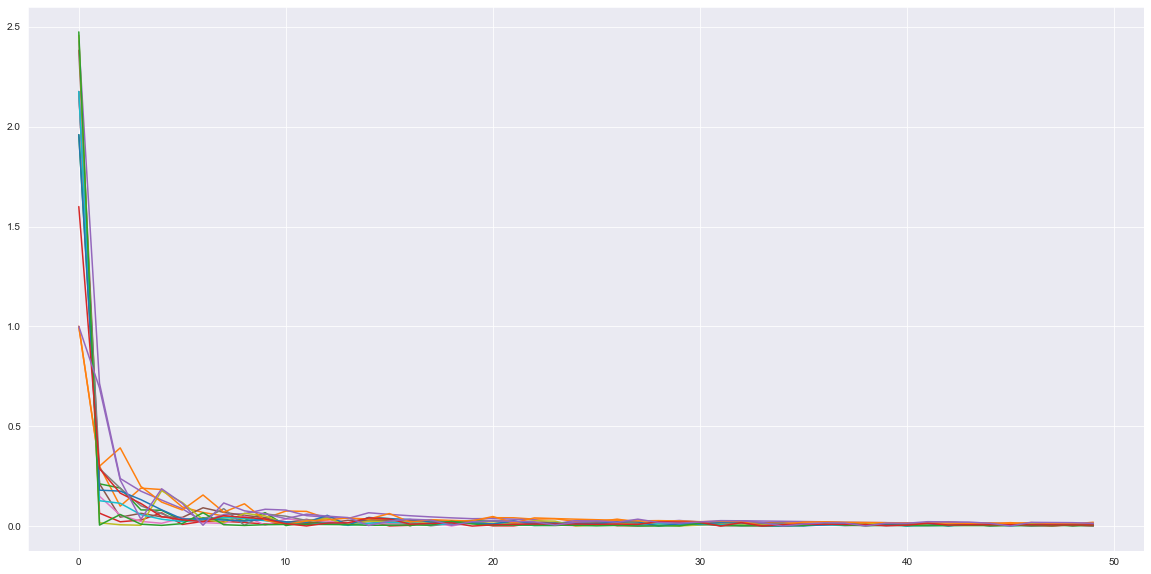

In [20]:
# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

```
git clone https://github.com/rybskej/atari-py
cd atari-py
python setup.py install
pip install cmake
pip install gym
pip install gym[atari]
```

In [1]:
#import numpy as np
import random

import gym
env = gym.make('Taxi-v2')

In [3]:
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s,a)] = 0.0

In [5]:
q

{(0, 0): 0.0,
 (0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (0, 4): 0.0,
 (0, 5): 0.0,
 (1, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (1, 3): 0.0,
 (1, 4): 0.0,
 (1, 5): 0.0,
 (2, 0): 0.0,
 (2, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (2, 4): 0.0,
 (2, 5): 0.0,
 (3, 0): 0.0,
 (3, 1): 0.0,
 (3, 2): 0.0,
 (3, 3): 0.0,
 (3, 4): 0.0,
 (3, 5): 0.0,
 (4, 0): 0.0,
 (4, 1): 0.0,
 (4, 2): 0.0,
 (4, 3): 0.0,
 (4, 4): 0.0,
 (4, 5): 0.0,
 (5, 0): 0.0,
 (5, 1): 0.0,
 (5, 2): 0.0,
 (5, 3): 0.0,
 (5, 4): 0.0,
 (5, 5): 0.0,
 (6, 0): 0.0,
 (6, 1): 0.0,
 (6, 2): 0.0,
 (6, 3): 0.0,
 (6, 4): 0.0,
 (6, 5): 0.0,
 (7, 0): 0.0,
 (7, 1): 0.0,
 (7, 2): 0.0,
 (7, 3): 0.0,
 (7, 4): 0.0,
 (7, 5): 0.0,
 (8, 0): 0.0,
 (8, 1): 0.0,
 (8, 2): 0.0,
 (8, 3): 0.0,
 (8, 4): 0.0,
 (8, 5): 0.0,
 (9, 0): 0.0,
 (9, 1): 0.0,
 (9, 2): 0.0,
 (9, 3): 0.0,
 (9, 4): 0.0,
 (9, 5): 0.0,
 (10, 0): 0.0,
 (10, 1): 0.0,
 (10, 2): 0.0,
 (10, 3): 0.0,
 (10, 4): 0.0,
 (10, 5): 0.0,
 (11, 0): 0.0,
 (11, 1): 0.0,
 (11, 2): 0.0,
 (11, 3): 0.0,
 (11, 4): 

In [ ]:
def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
    qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
    q[(prev_state,action)] += alpha * (reward + gamma * qa - q[(prev_state,action)])